In [2]:
import scipy.stats as st
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm, skew
from sklearn import preprocessing 
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("Fish.csv")
data.dropna()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
data.tail(2)
data.isna().value_counts()

Species  Weight  Length1  Length2  Length3  Height  Width
False    False   False    False    False    False   False    159
Name: count, dtype: int64

In [5]:
data['Volume']=np.pi*data['Height']*data['Width']*data['Length1']
data

,Species,Weight,Length1,Length2,Length3,Height,Width,Volume
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,3375.331168
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,4051.439707
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,4364.440439
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,4686.304162
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,5318.774934
...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,105.248338
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,113.345330
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,108.697299
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,246.270103


In [6]:
#Checking the co-relation between wieght and volume
data1 = data[["Weight","Volume"]]

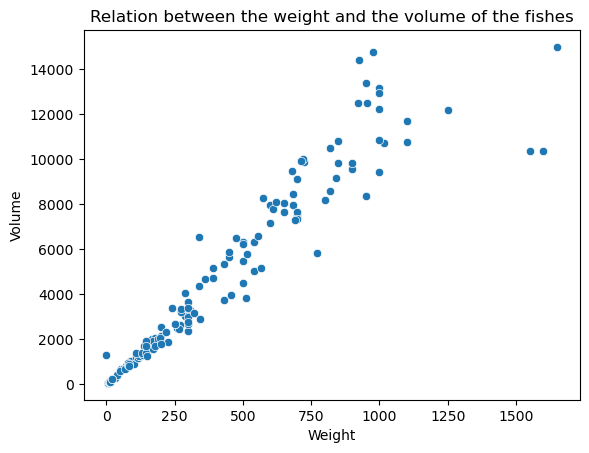

In [7]:
#Correlacion entre posibles variables peso y volumen
sns.scatterplot(x="Weight", y="Volume", data=data1)
plt.title("Relation between the weight and the volume of the fishes")
plt.show()

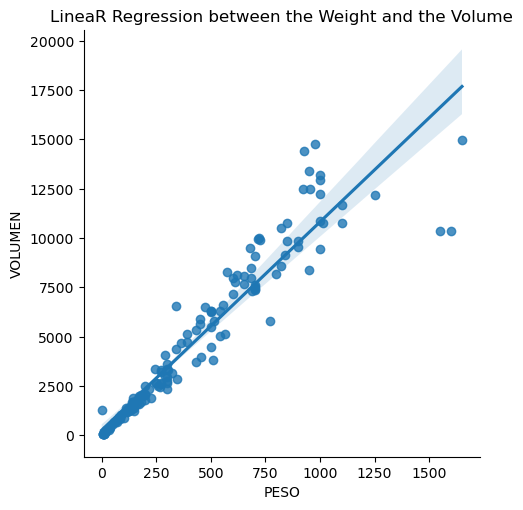

Pendiente: 10.559497918046254
Intercepto: 259.68708724312637
Error Estamdar: 0.27996801264420906
Coef correlacion: 0.949002133623508


In [8]:
#Realizar la regresion linear según la correlacion que parece que encontramos antes
sns.lmplot(x="Weight", y="Volume", data=data1)
plt.title("LineaR Regression between the Weight and the Volume")
plt.xlabel("PESO")
plt.ylabel("VOLUMEN")
#calculo para los valores de la RL, según estos resultados la pndiente de la regresion linear muestra que
#por cada unidad que incrementa en la variable independiente, la variable dependente 
#se incrementa en 10.55
#El intercepto de y muestra el valor de la variable dependiente cuando la variable independiente es cero
#El error estandar es la estimacion de 0.2799680126442086 que muestra la precision de la prediccion
#de la RL
#Por ultimo el Coef de corr nos muestra una relacion fuerte entre la variables independiente y dependiente
#esta correlacion es de tipo positivo ya que si una aumenta, la otra tambien aumentará

slope, intercept, r_value, p_value, std_err = st.linregress(data['Weight'], data['Volume'])
plt.show()
print(f'Pendiente: {slope}')
print(f'Intercepto: {intercept}')
print(f'Error Estamdar: {std_err}')
print(f'Coef correlacion: {r_value}')

4. ¿Qué sucede si aplicas el modelo anterior por separado a cada especie de peces?
Explica

In [9]:
#Filtrar por spicies creando una funcion que recibe el df, se entrega el nombre de la especia
#y devolve un df nuevo filtrado por la especie señalada.
#data.apply(lambda row: row[data["Species"].isin(["Pike"])])
#The above line of code can filter but could be repetitive so instead we transform it into a function
def filter_species(data, species):
    return data[data['Species']==species]


In [10]:
#Con esto almacenamos y convertimos a un df cada una de las especias
#array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']
bream = filter_species(data=data, species='Bream')
roach = filter_species(data=data, species='Roach')
whitefish = filter_species(data=data, species='Whitefish')
parkki = filter_species(data=data, species='Parkki')
perch = filter_species(data=data, species='Perch')
pike= filter_species(data=data, species='Pike')
smelt= filter_species(data=data, species='Smelt')


In [11]:
#Funcion para aplicar el modelo a cada especie
#le indicamos el data frame las columnas y nos devuelve el resumen y ploteo del modelo
def model_lr(data, x_column, y_column):
    X = data[x_column]
    y= data[y_column]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    results = model.summary()
    print(results)
    plt.scatter(data[x_column], data[y_column], label="Data")
    plt.plot(data[x_column], model.predict(X), color="red", label="Linear Regression")
    plt.xlabel("Peso del Pez")
    plt.ylabel("Volumen del Pez")
    plt.legend()
    plt.show()

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     401.0
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           4.93e-20
Time:                        20:53:13   Log-Likelihood:                -284.65
No. Observations:                  35   AIC:                             573.3
Df Residuals:                      33   BIC:                             576.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -416.9536    453.012     -0.920      0.3

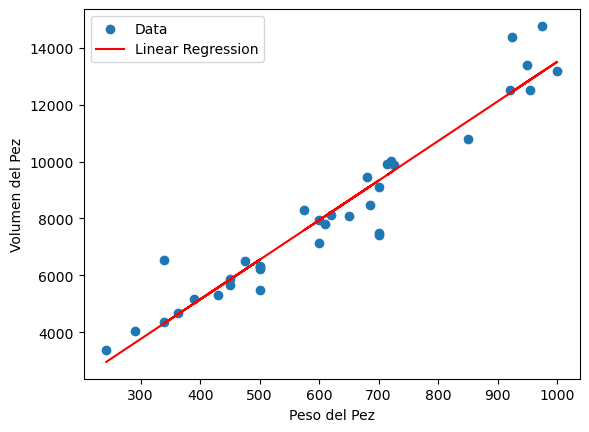

In [12]:
model_lr(bream, x_column=["Weight"], y_column=["Volume"])

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     148.4
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           3.96e-10
Time:                        20:53:13   Log-Likelihood:                -143.28
No. Observations:                  20   AIC:                             290.6
Df Residuals:                      18   BIC:                             292.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        156.8014    148.933      1.053      0.3

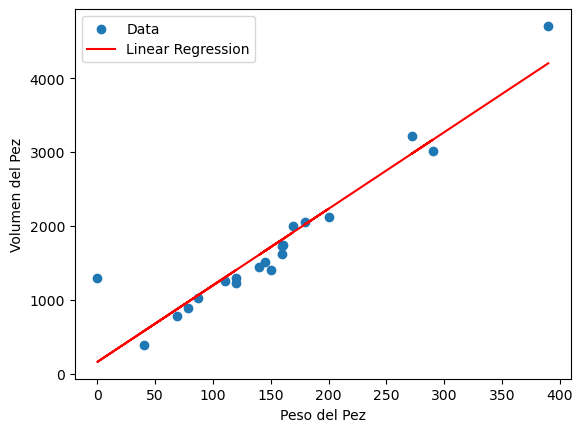

In [13]:
model_lr(data=roach, x_column=["Weight"], y_column=["Volume"])

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     162.7
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           0.000218
Time:                        20:53:14   Log-Likelihood:                -44.796
No. Observations:                   6   AIC:                             93.59
Df Residuals:                       4   BIC:                             93.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        351.9615    449.985      0.782      0.4

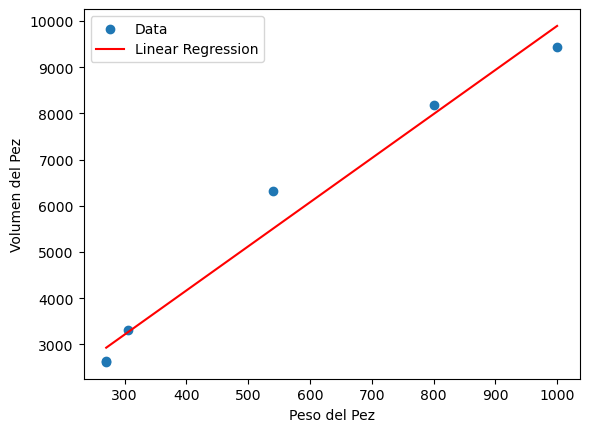

In [14]:
model_lr(data=whitefish, x_column=["Weight"], y_column=["Volume"])

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1028.
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           1.37e-10
Time:                        20:53:14   Log-Likelihood:                -64.699
No. Observations:                  11   AIC:                             133.4
Df Residuals:                       9   BIC:                             134.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -57.6599     66.245     -0.870      0.4

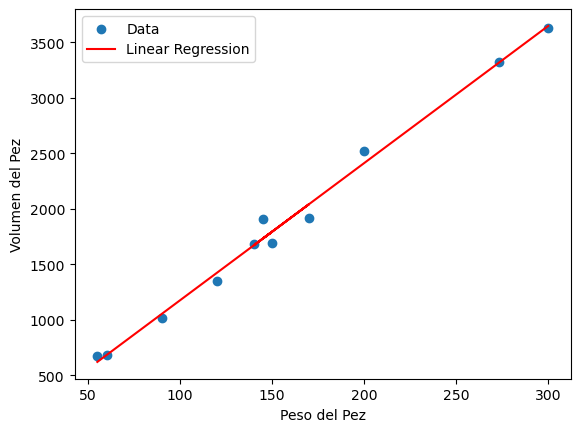

In [15]:
model_lr(data=parkki, x_column=["Weight"], y_column=["Volume"])

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     3754.
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           1.36e-51
Time:                        20:53:15   Log-Likelihood:                -423.53
No. Observations:                  56   AIC:                             851.1
Df Residuals:                      54   BIC:                             855.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -138.7191     94.719     -1.465      0.1

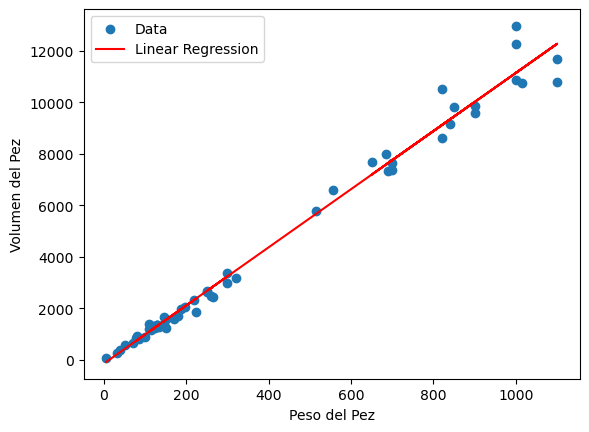

In [16]:
model_lr(data=perch, x_column=["Weight"], y_column=["Volume"])

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     176.4
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           1.07e-09
Time:                        20:53:15   Log-Likelihood:                -142.53
No. Observations:                  17   AIC:                             289.1
Df Residuals:                      15   BIC:                             290.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        479.0923    492.940      0.972      0.3

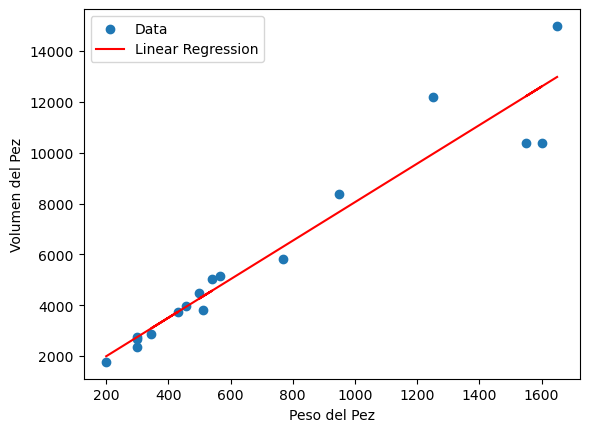

In [17]:
model_lr(data=pike, x_column=["Weight"], y_column=["Volume"])

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     219.1
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           4.53e-09
Time:                        20:53:15   Log-Likelihood:                -55.528
No. Observations:                  14   AIC:                             115.1
Df Residuals:                      12   BIC:                             116.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.9222     10.990     -3.814      0.0

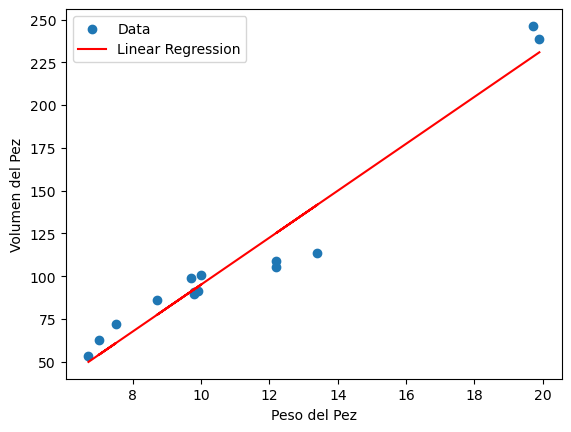

In [18]:
model_lr(data=smelt, x_column=["Weight"], y_column=["Volume"])

En Base a los resultados aplicados a cada una de las especies de PEZ según el modelo, de las 7 especies las que mejor se ajustan al modelo y con las que mayoritariamente se puede trabajar son Perch y Bream, mientras las otras no entregan resultados fiables ya sea porque la muestra es n>=20 o las correlaciones son en su mayoria "nonrobust"

5. Construye un modelo de regresión que relacione dos o más variables con el peso de
los peces. Realiza una breve evaluación del modelo.

In [19]:
#Construccion de modelo de regresion relacionando dos variables con el peso de los peces
#Para este caso utilizamos ANcho y volumen ademas de peso
#Podemos apreciar que el r2 es cercano a 1 lo que nos indica que este modelo tiene un mejor ajuste de datos
#

X= data[['Volume', 'Width']]
y= data['Weight']
X=sm.add_constant(X)
model = sm.OLS(y, X).fit()
results = model.summary()
predictions = model.predict(X)
mse = ((y-predictions)**2).mean()
emse = mse/((y-y.mean())**2).mean()
#r2 Value
r2 = model.rsquared
print(results)
print(f'Mean Square Error: {mse:.2f}')
print(f'Error Mean Square Explained:{emse:.2}')
print(f'Determination Coeficient:{r2:.2}')

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     738.4
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           2.85e-80
Time:                        20:53:16   Log-Likelihood:                -973.42
No. Observations:                 159   AIC:                             1953.
Df Residuals:                     156   BIC:                             1962.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -66.9875     36.192     -1.851      0.0

EL MSE nos muestra que la diferencia cuadrada entre lo predecido y el modelo actual es 12166.61 
El EMSE SUgiere que es el 9.6% del total de la variana en la variable dependiente puede ser explicada por las variables independeientes, mientras más cerca de 1 se encuentre el EMSE mas de la varianza explica el modelo.
Coeficiente de Determinación R2 es 0.9 lo que significa que el 90% del a varianza en la variable dependiente puede ser explicada por las variables independientes. Mientras más cercano a 1 este el R2 mejor el modelo se ajusta a los datos.